Let's begin by defining all the dependencies, all the cosmethics and the given physical values

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})

m=40*1.66*1e-27
kb=1.3806*1e-23
T=3
mu = 30*kb*T
A=3.5e+31
beta = 1/(kb*T)
n=1
meanTH = (3/5)*n*mu

Let's plot the function to see the result

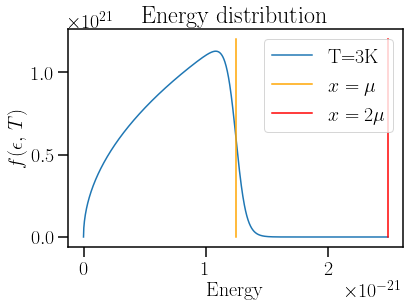

In [3]:
def f(epsilon, Temp):
    beta    = 1/(kb*Temp)
    numer   = A*np.sqrt(epsilon)
    denom   = np.exp(beta*(epsilon-mu)) + 1.0
    return numer/denom 

xfunc = np.linspace(0,2*mu,1000)
yfunc = f(xfunc,3)
plt.plot(xfunc,yfunc, label = "T=3K")
plt.plot([mu, mu],[0,1.2e21], color = "orange", label = "$x = \mu$")
plt.plot([2*mu, 2*mu],[0,1.2e21], color = "red", label = "$x=2\mu$")
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.title("Energy distribution")
plt.legend()

# Exercice 1

a) We have to show that the given function : 
$$
f(\epsilon) = A \dfrac{\sqrt{\epsilon}}{\exp(\beta(\epsilon-\mu))+1}
$$
is indeed a pdf

In [4]:
xMin=0
xMax=2*mu

#If you want to compute the integral of a function, just implement it
#Useful for the integral = 1 or the standard deviation.
def integral(n):
    nPts=n+1
    nInt=n
    x=np.linspace(xMin,xMax,nPts)
    y=np.zeros(len(x))
    for i in range(len(x)):
        denom = np.exp(beta*(x[i]-mu))+1
        y[i]=A*np.sqrt(x[i])/denom
    integrale=0
    for i in range(n):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    return integrale

def integralMean(n):
    nPts=n+1
    nInt=n
    x=np.linspace(xMin,xMax,nPts)
    y=np.zeros(len(x))
    for i in range(len(x)):
        denom = np.exp(beta*(x[i]-mu))+1
        y[i]=A*x[i]*np.sqrt(x[i])/denom
    integrale=0
    for i in range(n):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    return integrale

def integralVar(n):
    nPts=n+1
    nInt=n
    x=np.linspace(xMin,xMax,nPts)
    y=np.zeros(len(x))
    for i in range(len(x)):
        denom = np.exp(beta*(x[i]-mu))+1
        y[i]=A*np.power((x[i]-meanTH),2)*np.sqrt(x[i])/denom
    integrale=0
    for i in range(n):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    return integrale

varTH=integralVar(1000)
mTH = integralMean(1000)



Text(0.5, 1.0, 'Numerical integral of $f$')

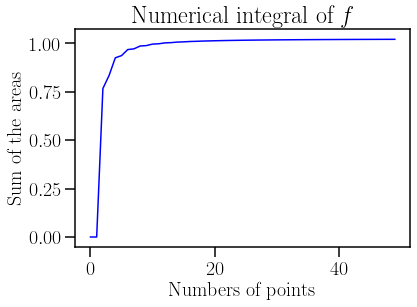

In [5]:
listint = np.zeros(50)
xplot = [*range(len(listint))]

for i in range(len(listint)):
    listint[i] = integral(i)

integral(5000)

plt.plot(xplot,listint, color = "blue")
plt.xlabel("Numbers of points")
plt.ylabel("Sum of the areas")
plt.title("Numerical integral of $f$")

b) Build a MC process to generate this probability density function for a large number of data
points, $N \gg 1$. Fill your results in a histogram, plot them and verify their correctness by
comparing them with the curve of the analytical form in Eq

In [6]:
def Egenerator(nEvents, Temp):
    listE =[]
    while len(listE)<nEvents :
        interval= (0, 2*mu)
        fmax    = np.max(f(np.linspace(*interval,1000),3))*1.05
        gen     = np.random.default_rng()
        x       = gen.uniform(*interval)
        y       = gen.uniform(0, fmax)
        if y < f(x, Temp):
            listE.append(x)
    return listE        

Text(0.5, 1.0, 'MC Generated Samples')

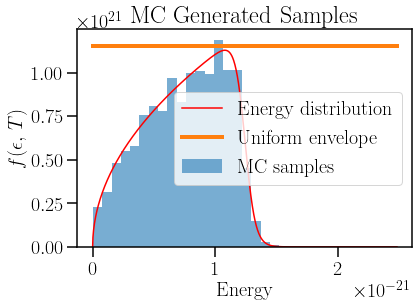

In [6]:
N       = 3000
nBins   = 20 
fmax    = np.max(f(np.linspace(0,2*mu,1000),3))*1.02
data    = Egenerator(N, 3)

plt.plot(xfunc,yfunc, color = "r", label = "Energy distribution")
content,bin_edges, _ = plt.hist(data, density=True, bins =nBins, alpha = 0.6, label = "MC samples")
plt.plot([0,2*mu],[fmax,fmax], label="Uniform envelope", lw=4)
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.legend()
plt.title("MC Generated Samples")

c) Compute the sample mean $\langle\epsilon\rangle$ and compare with the expectation value:
$$
E = \dfrac{3}{5}n\mu
$$

The mean is :  7.500186416938936e-22  The theoretial mean is :  7.455239999999998e-22  The mean computed with numpy is :  7.49441315632785e-22


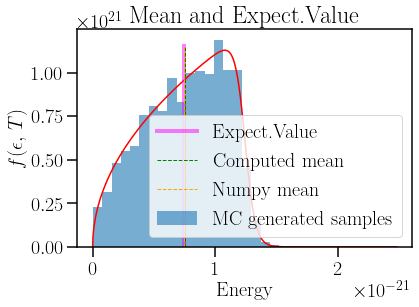

In [7]:
#Define the Width and the bin centers
#data = Egenerator(N, 3)
content,bin_edges, _ = plt.hist(data, density=True, bins =nBins, alpha = 0.6, label = "MC generated samples")
binWidth = (bin_edges[1] - bin_edges[0])
xCoords = bin_edges[:-1] + binWidth/2
#plt.scatter(list(xCoords), np.zeros(len(xCoords)), color = "red", label = "Bin center")

#compute the mean explicitely
mean = np.sum(content*xCoords) *binWidth
meanTH = (3/5)*n*mu
m = np.mean(data)


plt.plot(xfunc,yfunc, color = "red")
plt.plot([meanTH, meanTH], [0, fmax], color = "magenta",alpha = 0.5, lw = 4, label = "Expect.Value")
plt.plot([mean, mean], [0, fmax], '--', color = "green", lw = 1, label = "Computed mean")
plt.plot([m, m], [0, fmax], '--', color = "orange", lw = 1, label = "Numpy mean")

plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.legend()
plt.title("Mean and Expect.Value")

print("The mean is : " ,mean, " The theoretial mean is : " , meanTH, " The mean computed with numpy is : ", m)



We see that the analysis is coherent and we could have used the function np.mean before ... --'

d) calculate E/kB T . Compare it with what you learnt from exercise sheet 5 and comment.

We have : 
$$
\mathbb{E} = \dfrac{3}{5}n\mu = \dfrac{3}{5}n \cdot 30\,k_BT = 18 k_BT
$$
, Which is coherent with the result

In [8]:
print(mean/(kb*T))
print(m/(kb*T))

18.108519042297882
18.094580028798713


e) Compute the variance, skewness and kurtosis of the distribution and comment.

In [9]:
v       = np.var(data)
s       = stats.skew(data)
k       = stats.kurtosis(data)
stdev   = np.sqrt(v)
stdev_APP = stdev

print("variance = ", v , " skewness = ", s , " kurtosis = ", k, "stand dev = ", stdev)

variance =  1.0819917963680327e-43  skewness =  -0.2794200129795711  kurtosis =  -0.9011477315505627 stand dev =  3.2893643707683596e-22


# Exercice 2

a) Take Nexp = 1 and show the law of large numbers based on the data points you generated.

Now we take the data points we managed to get. They are all distributed according to $f$, with a mean of $18\cdot k_B T$ and a variance $var \approx 1.07 \cdot 10^{-43}$

If we want to show the laws of large numbers, we can show that if we progressively compute the mean for a given number of samples ($N_{exp}=1$), then the average will converge to a number, which should be the mean.

In [7]:
N=1e4
data = Egenerator(N,3)
l = len(data)

listMean = np.zeros(int(N/10))
for i in range(int(l/10)):
    moy = np.mean(data[:i+1])
    listMean[i] = moy
xMean = np.linspace(0,N,int(l/10))

Exp.value =  7.455239999999998e-22


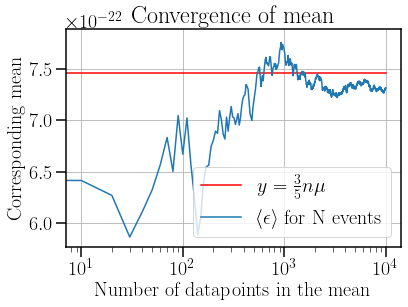

In [8]:
plt.plot([0,N],[(3/5)*mu,(3/5)*mu], color = "red", label = r"$y = \frac{3}{5}n\mu$")
plt.plot(xMean, listMean, label = r"$\langle\epsilon\rangle $ for N events ")

plt.xlabel("Number of datapoints in the mean")
plt.ylabel("Corresponding mean")
plt.legend()
plt.grid()
plt.semilogx()
plt.title("Convergence of mean")
print("Exp.value = ", meanTH)

If we take the ratio, it converges asymptotically to 18

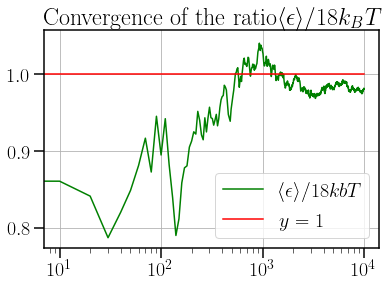

In [9]:
ratio = [listMean/(18*kb*T) for listMean in listMean]
plt.plot(xMean, ratio, color = "green", label = r"$\langle\epsilon\rangle/18 kb T$")
plt.plot([0,N],[1,1], color = "red", label = "$y = 1$")
plt.semilogx()
plt.grid()
plt.title("Convergence of the ratio"+r"$\langle\epsilon\rangle/18k_BT$")
plt.legend()


b) Take Nexp >> 1 and show the validity of the central limit theorem for the mean :

We will take for example 2000 experiment and every time, we will compute the mean and put it in a list

In the end, we put it in a histogram and see if it is a Gaussian.

In [13]:
def gauss(x, gmean, gsigma):
    pref = 1/(np.sqrt(2*np.pi)*gsigma)
    return pref*np.exp(-(x-gmean)*(x-gmean)/(2*gsigma*gsigma))

In [14]:
#MC integral of the mean
nInt    = 50000
dat     = Egenerator(nInt,3)
est     = (1/nInt)*np.sum(dat)
var     = (1/nInt)*np.sum(np.power(dat,2))-np.power(est,2)

In [15]:
nEvents = 100000
interval= (0, 2*mu)
xf      = np.linspace(*interval,1000)
fmax    = np.max(xf*f(xf,T))*1.05
listE =[]
count = 0
while len(listE)<nEvents :
    gen     = np.random.default_rng()
    x       = gen.uniform(*interval)
    y       = gen.uniform(0, fmax)
    if y < (x*f(x, T)):
        listE.append(x)
    count+=1

r = (len(listE)/count)*2*mu*fmax/1.05
r

7.309668129545592e-22

In [17]:
#Code takes a bit of time to run
N=1000
Nexp = 5000

k=1
listMean = []
listVar = []
while k<=Nexp :
    dat     = Egenerator(N,3)
    mean2   = np.mean(dat)
    var2    = np.var(dat)
    listMean.append(mean2)
    listVar.append(var2)
    k = k+1

7.455239999999998e-22


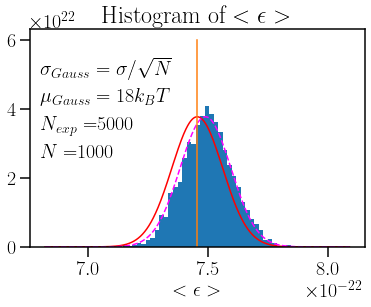

In [18]:
sigmaCLT = np.sqrt(varTH)/np.sqrt(N)
meanCLT = meanTH
xplot = np.linspace(meanTH-6*sigmaCLT, meanTH+6*sigmaCLT, 1000)
yplot = gauss(xplot, meanCLT, sigmaCLT)
yplot2 = gauss(xplot, est, sigmaCLT)


plt.hist(listMean, density=True, bins = 40)
plt.plot(xplot,yplot, color ="red")
plt.plot(xplot,yplot2, "--", color ="magenta")
plt.title(r"Histogram of $\langle\epsilon\rangle$" )
plt.xlabel("$<\epsilon>$")
plt.plot([meanTH, meanTH],[0,6e22])

plt.text(meanTH-6.2*sigmaCLT, 5e22, "$\sigma_{Gauss} = \sigma/\sqrt{N}$"    , horizontalalignment='left')
plt.text(meanTH-6.2*sigmaCLT, 4.2e22, "$\mu_{Gauss} = 18k_BT$"                , horizontalalignment='left')
plt.text(meanTH-6.2*sigmaCLT, 3.4e22, "$N_{exp}=$"+ str("{:.0f}".format(Nexp)), horizontalalignment='left')
plt.text(meanTH-6.2*sigmaCLT, 2.6e22, '$N=$'+ str("{:.0f}".format(N))         , horizontalalignment='left')

print(meanTH)

TEST

(array([0.00138525, 0.        , 0.00138525, 0.00969676, 0.00138525,
        0.00692626, 0.01108201, 0.01108201, 0.01108201, 0.02077878,
        0.02631978, 0.04432805, 0.06787733, 0.10666438, 0.08865611,
        0.15237769, 0.19116473, 0.16484495, 0.21748452, 0.28536185,
        0.31722264, 0.2839766 , 0.3643212 , 0.36847695, 0.4100345 ,
        0.41973126, 0.40033774, 0.41419026, 0.35046868, 0.36016544,
        0.30614063, 0.26458307, 0.22164027, 0.203632  , 0.17315646,
        0.13436941, 0.11774639, 0.11082014, 0.07895935, 0.05956582,
        0.05541007, 0.02770503, 0.02077878, 0.01939352, 0.00969676,
        0.00415576, 0.00138525, 0.0027705 , 0.00415576, 0.00138525]),
 array([-3.31365214, -3.16927404, -3.02489595, -2.88051786, -2.73613976,
        -2.59176167, -2.44738357, -2.30300548, -2.15862739, -2.01424929,
        -1.8698712 , -1.72549311, -1.58111501, -1.43673692, -1.29235882,
        -1.14798073, -1.00360264, -0.85922454, -0.71484645, -0.57046835,
        -0.42609026, -0.28

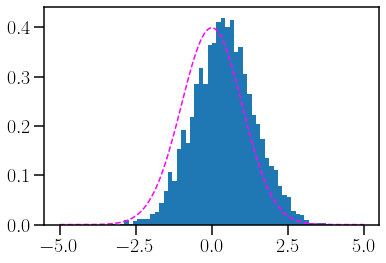

In [19]:
stdDev = np.mean(np.sqrt(listVar))
Z= [(listMean-meanTH)/(stdDev/np.sqrt(N)) for listMean in listMean]

xTest = np.linspace(-5 , 5 , 1000)
yTest = gauss(xTest, 0, 1)


plt.plot(xTest, yTest, "--", color =  "magenta")
plt.hist(Z, density = True, bins = 50)

c) Compute the variance of 〈e〉 and compare it with the value you expect.

In [20]:
np.var(listMean)/(sigmaCLT**2)

0.982636454649987

This is almost 1, that means that they are roughly the same

# Exercice 3

a) What is the expected p.d.f. for the number of entries per bin?

the number of entries per bin is large => Gaussian with mean $f$. Let's compute the chi2 for one experiment ang generalise later.

Text(0.5, 1.0, 'Comparaison of Poisson and Normal')

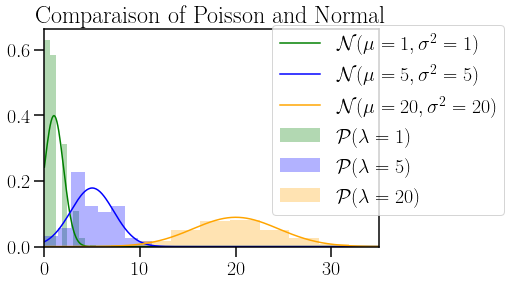

In [21]:
xPoisson = np.linspace(0,40, 400)
plt.hist(np.random.poisson(1,5000),alpha = 0.3, color = "green", density= True, label = "$\mathcal{P}(\lambda=1)$")
plt.hist(np.random.poisson(5,5000),alpha = 0.3, color = "blue", density= True, label = "$\mathcal{P}(\lambda=5)$")
plt.hist(np.random.poisson(20,5000),alpha = 0.3, color = "orange", density= True, label = "$\mathcal{P}(\lambda=20)$")

plt.plot(xPoisson,gauss(xPoisson,1,np.sqrt(1)), color = "green", label = "$\mathcal{N}(\mu =1, \sigma^2 = 1)$")
plt.plot(xPoisson,gauss(xPoisson,5,np.sqrt(5)), color = "blue", label = "$\mathcal{N}(\mu=5, \sigma^2 = 5)$")
plt.plot(xPoisson,gauss(xPoisson,20,np.sqrt(20)), color = "orange", label = "$\mathcal{N}(\mu=20, \sigma^2 = 20) $")

plt.legend( bbox_to_anchor=(0.65,0.1))
plt.xlim(0,35)
plt.title("Comparaison of Poisson and Normal")

12.459392515820259

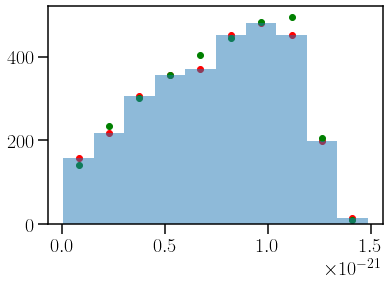

In [22]:
Nexp=1
N=3000
data = Egenerator(N,T)
nBins = 10

content,edges = np.histogram(data, bins = nBins, density=False)
width = edges[1]-edges[0]
xExp = edges[:-1] + width/2

    #Uncomment to see what happend
plt.hist(data, bins = nBins, density=False, alpha = 0.5)
#plt.plot(xfunc,yfunc, color = "red")
plt.scatter(xExp, content, color = "red")
plt.scatter(xExp, N*f(xExp,T)*width, color = "green")


#The observed value is content[i] and the coordinate xExp[i]
#The expected value is f(epsilon, T) at xExp[i]
#Compute the difference

chi2 = 0
for j in range(len(content)):
    fj = N*f(xExp[j],T)*width
    dif = np.power((content[j]-fj),2)/fj
    chi2 = chi2 + dif

chi2

Define a function for it

In [23]:
def doChiBin(binContent, binEdges):
    w = binEdges[1]-binEdges[0]
    xc = binEdges[:-1] + w/2
    X = 0
    for j in range(len(binContent)):
        fj = N*f(xc[j],T)*w
        d = np.power((binContent[j]-fj),2)/fj
        X = X + d
    return X


In [24]:
Nexp=1000
N=500
nBins = 10
chiList = np.zeros(Nexp)
 
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList[i] =doChiBin(content, edges)
chiList = chiList[chiList< 45]

(0.0, 45.0)

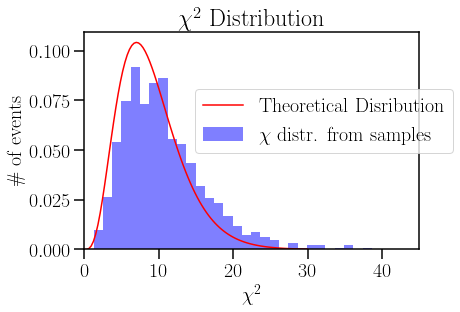

In [25]:
xChi = np.linspace(0,30,100)
yChi = stats.chi2.pdf(xChi,nBins-1)

plt.hist(chiList, density=True, bins = 30, color = "blue", alpha = 0.5, label = "$\chi$ distr. from samples")
plt.plot(xChi,yChi, color = "red", label = "Theoretical Disribution")

plt.title("$\chi^2$ Distribution")
plt.xlabel("$\chi^2$")
plt.ylabel("\# of events")
plt.legend( bbox_to_anchor=(0.3,0.4))
plt.xlim(0,45)


c) How does the χ2 distribution change with the number of bins?

In [26]:
Nexp=1000
N=500
chiList1 = np.zeros(Nexp)
chiList2 = np.zeros(Nexp)
chiList3 = np.zeros(Nexp)
chiList4 = np.zeros(Nexp)

nBins = 5
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList1[i] =doChiBin(content, edges)
chiList1 = chiList1[chiList1< 50]

nBins = 10
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList2[i] =doChiBin(content, edges)
chiList2 = chiList2[chiList2< 50]

nBins = 15
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList3[i] =doChiBin(content, edges)
chiList3 = chiList3[chiList3< 50]

nBins = 25
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList4[i] =doChiBin(content, edges)
chiList4 = chiList4[chiList4< 50]

Text(0, 0.5, '\\# of events')

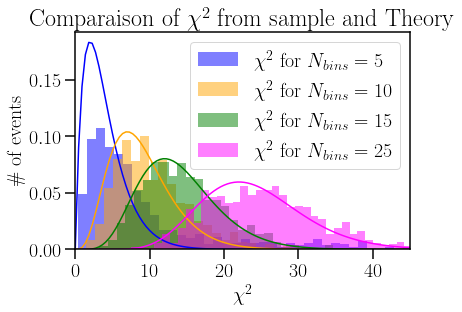

In [27]:
plt.hist(chiList1, density = True, bins = 40, alpha = 0.5, color = "blue"     , label = "$\chi^2$ for $N_{bins}=5$")
plt.hist(chiList2, density = True, bins = 40, alpha = 0.5, color = "orange"   , label = "$\chi^2$ for $N_{bins}=10$")
plt.hist(chiList3, density = True, bins = 40, alpha = 0.5, color = "green"    , label = "$\chi^2$ for $N_{bins}=15$")
plt.hist(chiList4, density = True, bins = 40, alpha = 0.5, color = "magenta"  , label = "$\chi^2$ for $N_{bins}=25$")

xChi = np.linspace(0,45,100)
yChi1 = stats.chi2.pdf(xChi,4)
yChi2 = stats.chi2.pdf(xChi,9)
yChi3 = stats.chi2.pdf(xChi,14)
yChi4 = stats.chi2.pdf(xChi,24)
plt.xlim(0,45)

plt.plot(xChi,yChi1, color = "blue")
plt.plot(xChi,yChi2, color = "orange")
plt.plot(xChi,yChi3, color = "green")
plt.plot(xChi,yChi4, color = "magenta")

plt.legend()
plt.title("Comparaison of $\chi^2$ from sample and Theory")
plt.xlabel("$\chi^2$ ")
plt.ylabel("\# of events")

# Exercice 4

a) Compute the log likelihood ln L(x1, x2, ..., xN | μ) at a given μ. Then, use the maximum
likelihood method to estimate μ and its variance

In [102]:
N=700
Nexp=5000
nBins=20
data = Egenerator(N,T)
Ttest=np.linspace(0.5, 7, 300)
#plt.hist(data)

In [103]:
def LLH(testData,Ttest):
    Loutput=0
    for i in range(0,len(testData)):
        Loutput+=math.log(f(testData[i],Ttest))
    return -Loutput

print (LLH(data,3))

-33719.801487220655


Do this for various mu in the interval (0.5,10)

In [104]:
listLikeliHood = np.zeros(len(Ttest))

for i in range(len(Ttest)):
    l = LLH(data,Ttest[i])
    listLikeliHood[i] = l

Lmin = min(listLikeliHood)
indexLmin = (listLikeliHood.tolist()).index(Lmin)

for i in range(len(Ttest)): #Normalize
    listLikeliHood[i] -= Lmin

TParam = Ttest[indexLmin]
print (TParam,min(listLikeliHood))

i1=0
i2=0
for i in range(0,len(Ttest)-1):
    if listLikeliHood[i]>0.5 and listLikeliHood[i+1]<0.5:
        i1=i
    if listLikeliHood[i]<0.5 and listLikeliHood[i+1]>0.5:
        i2=i

err = (Ttest[i2]-Ttest[i1])/2


print ('The error of the estimation=',err)

2.8478260869565215 0.0
The error of the estimation= 0.3913043478260869


mu =  117.95 +- 16.21
Expected result :  124.25


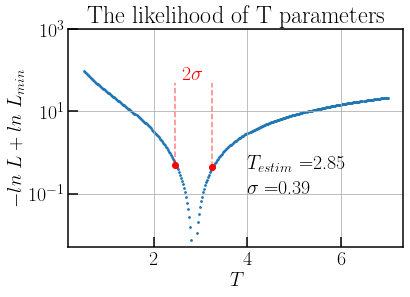

In [105]:
#plt.plot(Ttest,listLikeliHood,'-',lw=3)
plt.scatter(Ttest,listLikeliHood, s=3)
plt.scatter([TParam-err,TParam+err],[listLikeliHood[i1],listLikeliHood[i2]], color = "red")
plt.plot([TParam-err,TParam-err],[listLikeliHood[i1],50], "--",color = "red", alpha = 0.5)
plt.plot([TParam+err,TParam+err],[listLikeliHood[i2],50], "--",color = "red", alpha = 0.5)


plt.xlabel("$T$")
plt.ylabel("$-ln\ L+ln\ L_{min}$")
plt.title("The likelihood of T parameters")

plt.tick_params(direction='in')
plt.text(4,0.4, "$T_{estim} = $"+ str("{:.2f}".format(Ttest[indexLmin])) )
plt.text(4,0.1, "$\sigma = $"+ str("{:.2f}".format(err)) )
plt.text(TParam-0.25,60, "$2\sigma$", color ="red")

plt.semilogy()
plt.grid(True)
plt.ylim(0.005,1000)
print("mu = " , str("{:.2f}".format(30*kb*Ttest[indexLmin]*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : ",  str("{:.2f}".format(mu*1e23)))

In [32]:
result = np.zeros(Nexp)
stdResult = np.zeros(Nexp)

for i in range(Nexp):
    dat = Egenerator(N,T)
    listLikeliHood = np.zeros(len(Ttest))

    for j in range(len(Ttest)):
        l = LLH(dat,Ttest[j])
        listLikeliHood[j] = l

    Lmin = min(listLikeliHood)
    indexLmin = (listLikeliHood.tolist()).index(Lmin)
    TParam = Ttest[indexLmin]
    result[i] = TParam

    for k in range(len(Ttest)): #Normalize
        listLikeliHood[k] -= Lmin

    i1=0
    i2=0
    for l in range(0,len(Ttest)-1):
        if listLikeliHood[l]>0.5 and listLikeliHood[l+1]<0.5:
            i1=l
        if listLikeliHood[l]<0.5 and listLikeliHood[l+1]>0.5:
            i2=l
    err = (Ttest[i2]-Ttest[i1])/2
    stdResult[i] = err


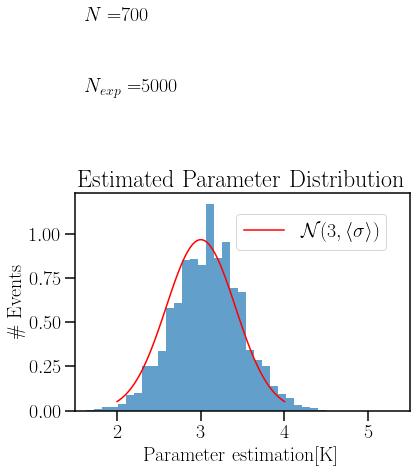

In [33]:
x = np.linspace(2,4,100)
y = gauss(x,3,np.mean(stdResult))
plt.hist(result, bins = 30, density=True, alpha = 0.7)
plt.plot(x,y, color = "red", label = r"$\mathcal{N}(3,\langle\sigma\rangle)$")
plt.xlim(1.5,5.5)

plt.xlabel("Parameter estimation[K]")
plt.ylabel("\# Events")
plt.text(1.6, 2.2, "$N =$"+str("{:.0f}".format(N)))
plt.text(1.6, 1.8, "$N_{exp} =$"+str("{:.0f}".format(Nexp)))
plt.title("Estimated Parameter Distribution")
plt.legend(bbox_to_anchor=(0.45,0.95))


In [1]:
cont,edg,_= plt.hist(result, bins = 60, density=True, alpha = 0.7)
plt.plot([Ttest[indexLmin],Ttest[indexLmin]],[0,1])

w=edg[1]-edg[0]
edgSum = edg[edg<Ttest[indexLmin]][1:]
pVal = np.sum(cont[:len(edgSum)])*w
print("The p-value of the estimation before is : "+str("{:.2f}".format(pVal*100)) + "%")


NameError: name 'plt' is not defined

b) Compute the goodness of fit at various μ and use the least squares method to estimate μ
and its variance.

Let's now define a list of different $ \mu $  and for each one of them compute the least squares : 

$$
X = \sum (\dfrac{y(\epsilon)-f(\epsilon, T)}{\sigma})^2
$$

14.592602785011849


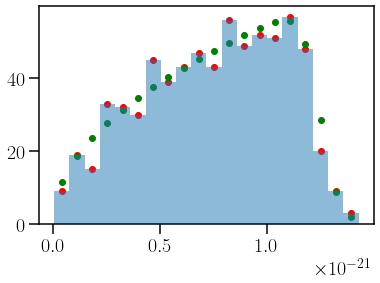

In [34]:
content,edges = np.histogram(data, bins = nBins, density=False)
width = edges[1]-edges[0]
xExp = edges[:-1] + width/2
yerr = np.sqrt(content)

c=0
for i in range(len(content)):
    fj = N*f(xExp[i], 3)*width
    dif = np.power((content[i]-fj)/(yerr[i]),2)
    c+=dif


plt.hist(data, bins = nBins, density=False, alpha = 0.5)
plt.scatter(xExp, content, color = "red")
plt.scatter(xExp, N*f(xExp,T)*width, color = "green")
print(c)

In [35]:
def LeastSquare(data, nBins, params):
    content,edges = np.histogram(data, bins = nBins, density=False)
    width = edges[1]-edges[0]
    xExp = edges[:-1] + width/2
    yerr = np.sqrt(content)
    listX2 =  []
    for j in range(len(params)):
        c=0
        for i in range(len(content)):
            if(content[i]==0):
                dif=0
            else:
                fj = N*f(xExp[i], params[j])*width
                dif = np.power((content[i]-fj)/(yerr[i]),2)
                c+=dif
        listX2.append(c)
    return listX2
    

mu =  134.16 +- 21.61
Expected result :  124.25


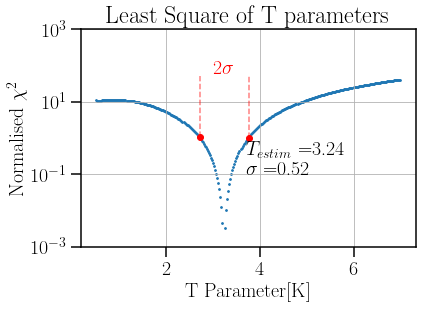

In [36]:
x2List = LeastSquare(data, nBins, Ttest)
jmin = x2List.index(min(x2List))
x2Min = x2List[jmin]
parMin = Ttest[jmin]

for i in range(len(x2List)):
    x2List[i] = x2List[i]-x2Min

j1=0
j2=0
for i in range(len(Ttest)-1):
    if x2List[i]>1 and x2List[i+1]<1:
        j1=i
    if x2List[i]<1 and x2List[i+1]>1:
        j2=i

err = (Ttest[j2]-Ttest[j1])/2

plt.scatter(Ttest, x2List, s=3)
plt.scatter(Ttest[jmin], x2List[jmin], color = "green")
plt.scatter([parMin-err,parMin+err],[x2List[j1],x2List[j2]], color = "red")

plt.xlabel("T Parameter[K]")
plt.ylabel("Normalised $\chi^2$")
plt.title("Least Square of T parameters")
plt.semilogy()
plt.ylim(1e-3,1e3)
plt.grid()

plt.plot([parMin-err,parMin-err],[x2List[j1],50], "--",color = "red", alpha = 0.5)
plt.plot([parMin+err,parMin+err],[x2List[j2],50], "--",color = "red", alpha = 0.5)

plt.text(3.7,0.35, "$T_{estim} = $"+ str("{:.2f}".format(parMin)) )
plt.text(parMin-0.25,60, "$2\sigma$", color ="red")
plt.text(3.7,0.1, "$\sigma = $"+ str("{:.2f}".format(err)) )


print("mu = " , str("{:.2f}".format(30*kb*parMin*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : ",  str("{:.2f}".format(mu*1e23)))


In [37]:
resultx2 = np.zeros(Nexp)
stdResultx2 = np.zeros(Nexp)

for i in range(len(result)):
    dat = Egenerator(5000,3)
    ls = LeastSquare(dat, nBins, Ttest)
    jmin = ls.index(min(ls))
    x2Min = ls[jmin]
    parMin = Ttest[jmin]
    resultx2[i] = parMin

    for j in range(len(ls)):
        ls[j] = ls[j]-x2Min
    j1=0
    j2=0
    for k in range(len(Ttest)-1):
        if ls[k]>1 and ls[k+1]<1:
            j1=k
        if ls[k]<1 and ls[k+1]>1:
            j2=k
    err = (Ttest[j2]-Ttest[j1])/2
    stdResultx2[i] = err/2


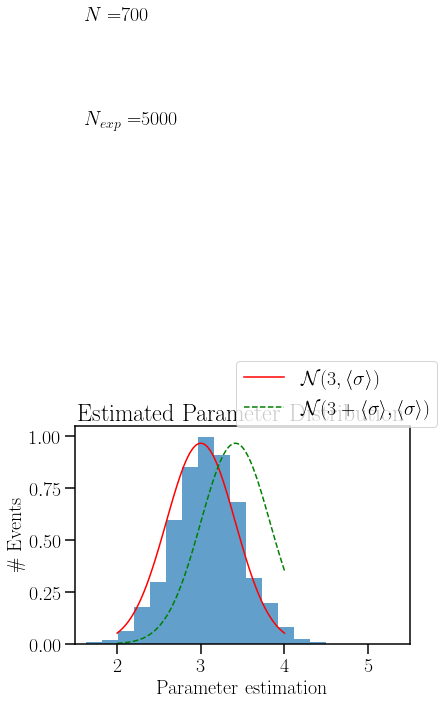

In [38]:
x = np.linspace(2,4,100)
y = gauss(x,3,np.mean(stdResult))
y2 = gauss(x,3+np.mean(stdResult),np.mean(stdResult))
plt.hist(result, bins = 15, density=True, alpha = 0.7)
plt.plot(x,y,       color = "red"   , label = r"$\mathcal{N}(3,\langle\sigma\rangle)$")
plt.plot(x,y2,"--" ,color = "green" , label = r"$\mathcal{N}(3+\langle\sigma\rangle ,\langle\sigma\rangle)$")
plt.xlim(1.5,5.5)

plt.xlabel("Parameter estimation")
plt.ylabel("\# Events")
plt.text(1.6, 3, "$N =$"+str("{:.0f}".format(N)))
plt.text(1.6, 2.5, "$N_{exp} =$"+str("{:.0f}".format(Nexp)))
plt.title("Estimated Parameter Distribution")
plt.legend(bbox_to_anchor=(0.45,0.95))


c) The parameter μ can also be estimated by computing the sample mean 〈e〉 of Eq. (1) with
the MC integral. Perform this estimation of μ and its corresponding variance.

We use : (x_i distriuted as f, energy)

$$
E_f(x)= \int_0^{2\mu} x\cdot f(x) dx \approx \dfrac{1}{N}\sum_{i=1}^N h(x_i)
$$

T = 3.00 +- 0.05
mu = 124.31 +- 2.05


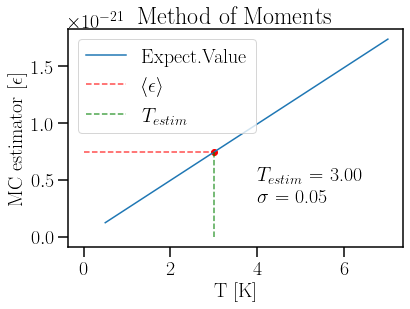

In [39]:
dat     = data
MCest   = (1/N)*np.sum(dat)
MCvar   = (1/N)*np.sum(np.power(dat,2))-np.power(MCest,2)
MCstd   = np.sqrt(MCvar)/np.sqrt(N)

xxx = Ttest
yyy = (3/5)*30*kb*xxx

estmu   = (5/3)*MCest
mustd   = (5/3)*MCstd
TMC     = (5/(3*30*kb))*MCest
varT    = (5/(3*30*kb))*MCstd

print("T = "  +str("{:.2f}".format(TMC))        + " +- " +str("{:.2f}".format(varT)))
print("mu = " +str("{:.2f}".format(estmu*1e23)) + " +- " +str("{:.2f}".format(mustd*1e23)))

xFillest = [0,TMC+varT,TMC-varT,0]
yFillest = [MCest+MCstd,MCest+MCstd,MCest-MCstd,MCest-MCstd]
xFillT = [TMC-varT, TMC-varT, TMC+varT, TMC+varT]
yFillT = [0,MCest-MCstd,MCest+MCstd,0]


plt.plot(xxx,yyy, label = "Expect.Value")
plt.plot([0,TMC],[MCest,MCest], "--"    , color = "red"     , alpha = 0.7, label = r"$\langle\epsilon\rangle$")
plt.scatter(TMC, (3/5)*30*kb*TMC        , color = "red")
plt.plot([TMC,TMC],[0,MCest]    , "--"  , color = "green"   , alpha = 0.7, label = r"$T_{estim}$")

plt.title("Method of Moments")
plt.xlabel("T [K]")
plt.ylabel("MC estimator $[\epsilon]$")


plt.text(4,0.5e-21,"$T_{estim}$ = " + str("{:.2f}".format(TMC)))
plt.text(4,0.3e-21,"$\sigma$ = " + str("{:.2f}".format(varT)))

plt.legend()



In [40]:
means   = np.zeros(Nexp)
vars    = np.zeros(Nexp)
for i in range(Nexp):
    dat     = Egenerator(N,T)
    MCest   = (1/N)*np.sum(dat)
    MCvar   = (1/N)*np.sum(np.power(dat,2))-np.power(MCest,2)
    MCstd   = np.sqrt(MCvar)

    TMC     = (5/(3*30*kb))*MCest
    varT    = (5/(3*30*kb))*MCstd

    means[i] = TMC
    vars[i] = varT

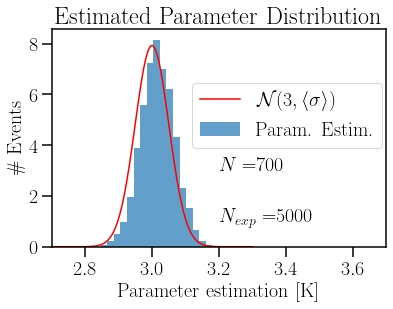

In [41]:
x = np.linspace(2.6,3.3,100)
y = gauss(x,3,np.mean(vars)/np.sqrt(N))

plt.hist(means, bins = 20, density=True, alpha = 0.7, label = "Param. Estim.")

plt.plot(x,y,       color = "red"   , label = r"$\mathcal{N}(3,\langle\sigma\rangle)$")
plt.xlim(2.7,3.7)

plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.text(3.2, 3, "$N =$"+str("{:.0f}".format(N)))
plt.text(3.2, 1, "$N_{exp} =$"+str("{:.0f}".format(Nexp)))
plt.title("Estimated Parameter Distribution")
plt.legend(bbox_to_anchor=(0.39,0.8))

# Exercice 5

In [42]:
data_1 = np.sort(Egenerator(N,3))  #Generate the data and sort it.
data_2 = np.sort(Egenerator(N,3))
data_conc = np.sort(np.concatenate((data_1, data_2)))

x = np.linspace(0,2*mu,len(data_1))

#print("data_1 :\n{}".format(data_1))
#print(20*'-')
#print("data_2 :\n{}".format(data_2))
#print(20*'-')
#print("data_conc :\n{}".format(data_conc))

In [43]:
# Compute the cumulative function using scipy "percentileofscore"

data_1_cum = [stats.percentileofscore(data_1, i)/100 for i in x]
#print('data_1_cum:\n{}'.format(data_1_cum))
#print(20*'-')

data_2_cum = [stats.percentileofscore(data_2, i)/100 for i in x]
#print('data_2_cum:\n{}'.format(data_2_cum))
#print(20*'-')

Text(0.5, 1.0, 'Cumulative probability')

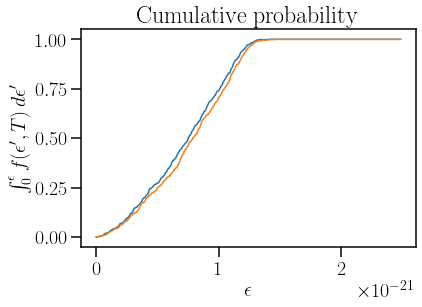

In [44]:
plt.plot(x,data_1_cum, label = "Data 1")
plt.plot(x,data_2_cum, label = "Data 2")

plt.xlabel("$\epsilon$")
plt.ylabel("$\int_0^{\epsilon} f(\epsilon',T) \,d\epsilon'$")
plt.title("Cumulative probability")


In [45]:
# Compute the (absolute difference) : 

data_diff = np.abs(np.subtract(data_1_cum, data_2_cum))
#print('data_diff:\n{}'.format(data_diff))

# Compute the max difference :
max_diff = max(data_diff)
max_diff

0.06142857142857139

In [46]:
# Approximate the 0.05% critical value :
d_crit = 1.358*np.sqrt(2/N)
d_crit

0.07258815330341446

In [47]:
# Compare the max difference with our critical value : 
if max_diff > d_crit :
    print('The null hypothesis is rejected')
else :
    print('We cannot reject the null hypothesis')

We cannot reject the null hypothesis


In [48]:
# Trying to use directly the 2-sample Kolmogorov test from scipy.stats:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
# https://stackoverflow.com/questions/39132469/how-to-interpret-scipy-stats-kstest-and-ks-2samp-to-evaluate-fit-of-data-t?rq=1

D_statistics, p_value = stats.ks_2samp(data_1,data_2) #D_statistics is the absolute max distance between the two samples

print('D_stats is :\n{}'.format(D_statistics), '\np_value is:\n{}'.format(p_value))

D_stats is :
0.06428571428571428 
p_value is:
0.110825058395259


We see that we get almost the same result using stats.ks.2samp than with our hand-made method (compare D_stats with max_diff)

In [49]:
alpha = [0.20, 0.15, 0.10, 0.05, 0.025, 0.01, 0.005, 0.001]
c_alpha = [1.073, 1.138, 1.224, 1.358, 1.628, 1.731, 1.949]

crit_value = []

for i in range(len(alpha)):
    crit = np.sqrt(-math.log(alpha[i]/2)*1/N)
    crit_value.append(np.round(crit,3))
print(crit_value)

# We then use that the null hypothesis (which is set as default as : "The two samples originate from the same distribution") is REJECTED if D_stats > values from wikipedia (https://en.m.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)
for i in range(len(alpha)):
    if D_statistics > crit_value[i]:
        print('The null hypothesis is rejected at the level:\n{}'.format(alpha[i]))
    else : 
        print('We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:\n{}'.format(alpha[i]))

[0.057, 0.061, 0.065, 0.073, 0.079, 0.087, 0.093, 0.104]
The null hypothesis is rejected at the level:
0.2
The null hypothesis is rejected at the level:
0.15
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.1
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.05
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.025
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.01
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.005
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.001


In [50]:
# Generalizing for Nexp = 100
N_exp = 100
i = 1
max_dist =[]
pList = []

while i <= N_exp :     
    data_1 = np.sort(Egenerator(N,3))
    data_2 = np.sort(Egenerator(N,3))    
    D_stat, p_value = stats.ks_2samp(data_1, data_2)
    max_dist.append(D_stat)    
    pList.append(p_value)
    i = i+1
    

In [51]:
# We can compare each of the D_stat value (for each exp) with the 95% confidence level (obtained by using the function we defined before):
# We use the percentileofscore function to see how many (in percentage) are below this value :

print('Crit value for alpha = 0.05 is :\n{}'.format(crit_value[3]))
percentile = stats.percentileofscore(max_dist, crit_value[3])

print('There are', percentile, "% of d <= crit_value : which means that in",percentile , "% of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.")

Crit value for alpha = 0.05 is :
0.073
There are 94.0 % of d <= crit_value : which means that in 94.0 % of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.


[]

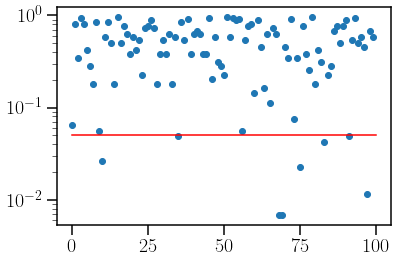

In [52]:
plt.scatter(range(len(pList)),pList)
plt.plot([0,100],[0.05,0.05], color = "red")
plt.semilogy()

In [53]:
t = np.array(pList)[np.array(pList)<0.05]
print(str("{:.1f}".format(100*(1-len(t)/200))))


96.0


# Exercise 6

In [72]:
data6       = Egenerator(1e4, T)
measured    = np.zeros(len(data6))
uncertainty = 2*kb*T

(array([8.40356400e+18, 2.85721176e+19, 7.05899376e+19, 1.73113418e+20,
        2.97486166e+20, 4.36985328e+20, 4.94129563e+20, 6.40351577e+20,
        6.21863736e+20, 7.29429355e+20, 6.94134386e+20, 7.42875057e+20,
        8.47079251e+20, 8.77332081e+20, 9.27753465e+20, 9.26072753e+20,
        9.63048434e+20, 1.06389120e+21, 9.15988476e+20, 1.13280043e+21,
        1.07229477e+21, 9.49602732e+20, 8.23549272e+20, 6.10098746e+20,
        4.13455349e+20, 2.31938366e+20, 7.39513632e+19, 2.35299792e+19,
        6.72285120e+18, 1.00842768e+19]),
 array([-1.71152796e-22, -1.11654231e-22, -5.21556661e-23,  7.34289905e-24,
         6.68414642e-23,  1.26340029e-22,  1.85838594e-22,  2.45337160e-22,
         3.04835725e-22,  3.64334290e-22,  4.23832855e-22,  4.83331420e-22,
         5.42829985e-22,  6.02328551e-22,  6.61827116e-22,  7.21325681e-22,
         7.80824246e-22,  8.40322811e-22,  8.99821376e-22,  9.59319941e-22,
         1.01881851e-21,  1.07831707e-21,  1.13781564e-21,  1.19731420e-21

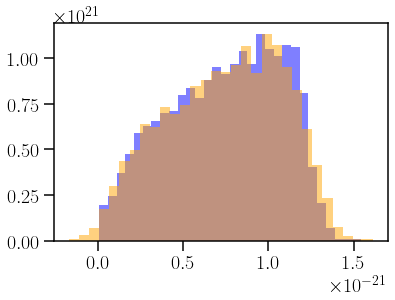

In [73]:
for i in range(len(data6)):
    measured[i] = data6[i] + np.random.normal(0,uncertainty)
mesPos = measured[measured>=0]

plt.hist(data6      , density=True, bins = 30, color = "blue"  , alpha = 0.5)
plt.hist(measured   , density=True, bins = 30, color = "orange", alpha = 0.5)

a) Likelihood (copy paste and take only positive $\epsilon$ values because of the $\sqrt{\epsilon}$)

4.6521739130434785 0.0
The error of the estimation= 0.1304347826086958
mu =  192.68 +- 5.40
Expected result :  124.25


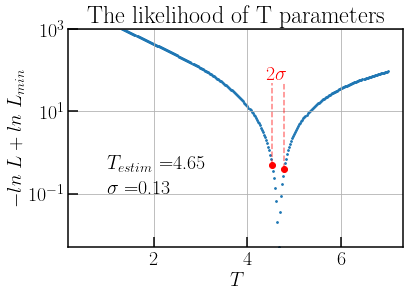

In [74]:
listLikeliHood = np.zeros(len(Ttest))

for i in range(len(Ttest)):
    l = LLH(mesPos,Ttest[i])
    listLikeliHood[i] = l

Lmin = min(listLikeliHood)
indexLmin = (listLikeliHood.tolist()).index(Lmin)

for i in range(len(Ttest)): #Normalize
    listLikeliHood[i] -= Lmin

TParam = Ttest[indexLmin]
print (TParam,min(listLikeliHood))

i1=0
i2=0
for i in range(0,len(Ttest)-1):
    if listLikeliHood[i]>0.5 and listLikeliHood[i+1]<0.5:
        i1=i
    if listLikeliHood[i]<0.5 and listLikeliHood[i+1]>0.5:
        i2=i

err = (Ttest[i2]-Ttest[i1])/2


print ('The error of the estimation=',err)


#plt.plot(Ttest,listLikeliHood,'-',lw=3)
plt.scatter(Ttest,listLikeliHood, s=3)
plt.scatter([TParam-err,TParam+err],[listLikeliHood[i1],listLikeliHood[i2]], color = "red")
plt.plot([TParam-err,TParam-err],[listLikeliHood[i1],50], "--",color = "red", alpha = 0.5)
plt.plot([TParam+err,TParam+err],[listLikeliHood[i2],50], "--",color = "red", alpha = 0.5)


plt.xlabel("$T$")
plt.ylabel("$-ln\ L+ln\ L_{min}$")
plt.title("The likelihood of T parameters")

plt.tick_params(direction='in')
plt.text(1,0.4, "$T_{estim} = $"+ str("{:.2f}".format(Ttest[indexLmin])) )
plt.text(1,0.1, "$\sigma = $"   + str("{:.2f}".format(err)) )
plt.text(TParam-0.25,60, "$2\sigma$", color ="red")

plt.semilogy()
plt.grid(True)
plt.ylim(0.005,1000)
print("mu = "               , str("{:.2f}".format(30*kb*Ttest[indexLmin]*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : "  ,  str("{:.2f}".format(mu*1e23)))

In [ ]:
uncertainResultLLH = np.zeros(Nexp)
uncertainStdResultLLH = np.zeros(Nexp)

for i in range(Nexp):

    dat = Egenerator(N,T)
    measured    = np.zeros(len(dat))
    for n in range(len(dat)):
        measured[n] = dat[n] + np.random.normal(0,uncertainty)
    dat = measured[measured>=0]

    listLikeliHood = np.zeros(len(Ttest))
    
    for j in range(len(Ttest)):
        l = LLH(dat,Ttest[j])
        listLikeliHood[j] = l

    Lmin = min(listLikeliHood)
    indexLmin = (listLikeliHood.tolist()).index(Lmin)
    TParam = Ttest[indexLmin]
    uncertainResultLLH[i] = TParam

    for k in range(len(Ttest)): #Normalize
        listLikeliHood[k] -= Lmin

    i1=0
    i2=0
    for l in range(0,len(Ttest)-1):
        if listLikeliHood[l]>0.5 and listLikeliHood[l+1]<0.5:
            i1=l
        if listLikeliHood[l]<0.5 and listLikeliHood[l+1]>0.5:
            i2=l
    err = (Ttest[i2]-Ttest[i1])/2
    uncertainStdResult[i] = err

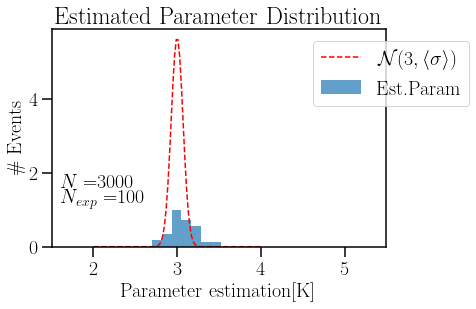

In [ ]:
x = np.linspace(2,4,100)
y = gauss(x,3,np.mean(stdResult))
plt.hist(result, bins = 30, density=True, alpha = 0.7, label = "Est.Param")
plt.plot(x,y, "--", color = "red", label = r"$\mathcal{N}(3,\langle\sigma\rangle)$")
plt.xlim(1.5,5.5)

plt.xlabel("Parameter estimation[K]")
plt.ylabel("\# Events")
plt.text(1.6, 1.6, "$N =$"+str("{:.0f}".format(N)))
plt.text(1.6, 1.2, "$N_{exp} =$"+str("{:.0f}".format(Nexp)))
plt.title("Estimated Parameter Distribution")
plt.legend(bbox_to_anchor=(0.75,0.99))

b) Least Square

mu =  232.30 +- 47.27
Expected result :  124.25


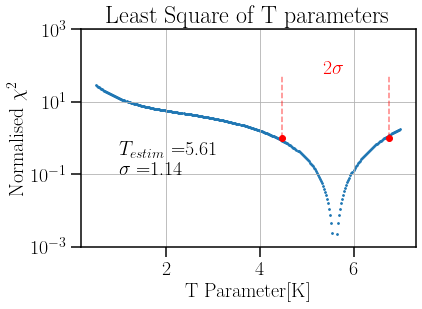

In [75]:
x2List = LeastSquare(mesPos, nBins, Ttest)
jmin = x2List.index(min(x2List))
x2Min = x2List[jmin]
parMin = Ttest[jmin]

for i in range(len(x2List)):
    x2List[i] = x2List[i]-x2Min

j1=0
j2=0
for i in range(len(Ttest)-1):
    if x2List[i]>1 and x2List[i+1]<1:
        j1=i
    if x2List[i]<1 and x2List[i+1]>1:
        j2=i

err = (Ttest[j2]-Ttest[j1])/2

plt.scatter(Ttest, x2List, s=3)
plt.scatter(Ttest[jmin], x2List[jmin], color = "green")
plt.scatter([parMin-err,parMin+err],[x2List[j1],x2List[j2]], color = "red")

plt.xlabel("T Parameter[K]")
plt.ylabel("Normalised $\chi^2$")
plt.title("Least Square of T parameters")
plt.semilogy()
plt.ylim(1e-3,1e3)
plt.grid()

plt.plot([parMin-err,parMin-err],[x2List[j1],50], "--",color = "red", alpha = 0.5)
plt.plot([parMin+err,parMin+err],[x2List[j2],50], "--",color = "red", alpha = 0.5)

plt.text(1,0.35, "$T_{estim} = $"+ str("{:.2f}".format(parMin)) )
plt.text(1,0.1, "$\sigma = $"+ str("{:.2f}".format(err)) )
plt.text(parMin-0.25,60, "$2\sigma$", color ="red")

print("mu = " , str("{:.2f}".format(30*kb*parMin*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : ",  str("{:.2f}".format(mu*1e23)))

In [ ]:
uncertainResultx2 = np.zeros(Nexp)
uncertainStdResultx2 = np.zeros(Nexp)

for i in range(len(result)):
    dat = Egenerator(N,T)
    measured    = np.zeros(len(dat))
    for n in range(len(data)):
        measured[n] = dat[n] + np.random.normal(0,uncertainty)
    dat = measured[measured>=0]
    ls = LeastSquare(dat, nBins, Ttest)
    jmin = ls.index(min(ls))
    x2Min = ls[jmin]
    parMin = Ttest[jmin]
    result[i] = parMin

    for j in range(len(ls)):
        ls[j] = ls[j]-x2Min
    j1=0
    j2=0
    for k in range(len(Ttest)-1):
        if ls[k]>1 and ls[k+1]<1:
            j1=k
        if ls[k]<1 and ls[k+1]>1:
            j2=k
    err = (Ttest[j2]-Ttest[j1])/2
    stdResult[i] = err/2

KeyboardInterrupt: 

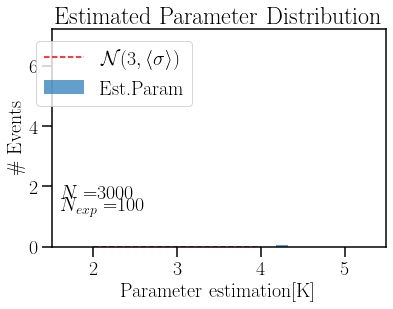

In [ ]:
x = np.linspace(2,4,100)
y = gauss(x,3,np.mean(stdResult))
plt.hist(result, bins = 30, density=True, alpha = 0.7, label = "Est.Param")
plt.plot(x,y, "--", color = "red", label = r"$\mathcal{N}(3,\langle\sigma\rangle)$")
plt.xlim(1.5,5.5)

plt.xlabel("Parameter estimation[K]")
plt.ylabel("\# Events")
plt.text(1.6, 1.6, "$N =$"+str("{:.0f}".format(N)))
plt.text(1.6, 1.2, "$N_{exp} =$"+str("{:.0f}".format(Nexp)))
plt.title("Estimated Parameter Distribution")
plt.legend(bbox_to_anchor=(0.45,0.99))

c) Method of moments

T = 3.00 +- 0.01


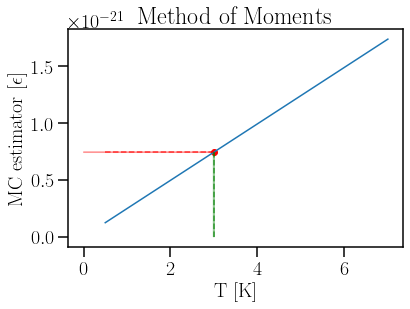

In [80]:
dat     = measured
MCest   = (1/1e4)*np.sum(dat)
MCvar   = (1/1e4)*np.sum(np.power(dat,2))-np.power(MCest,2)
MCstd   = np.sqrt(MCvar)/np.sqrt(1e4)

xxx = Ttest
yyy = (3/5)*30*kb*xxx

estmu   = (5/3)*MCest
TMC     = (5/(3*30*kb))*MCest
varT    = (5/(3*30*kb))*MCstd

xFillest = [0,TMC+varT,TMC-varT,0]
yFillest = [MCest+MCstd,MCest+MCstd,MCest-MCstd,MCest-MCstd]
xFillT = [TMC-varT, TMC-varT, TMC+varT, TMC+varT]
yFillT = [0,MCest-MCstd,MCest+MCstd,0]

plt.plot(xxx,yyy)
plt.plot([0.5,TMC],[MCest,MCest], "--"  , color = "red"     , alpha = 0.7)
plt.scatter(TMC, (3/5)*30*kb*TMC        , color = "red")
plt.plot([TMC,TMC],[0,MCest]    , "--"  , color = "green"   , alpha = 0.7)

plt.fill(xFillest, yFillest             , color = "red"     , alpha = 0.3)
plt.fill(xFillT, yFillT                 , color = "green"   , alpha = 0.3)

plt.title("Method of Moments")
plt.xlabel("T [K]")
plt.ylabel("MC estimator $[\epsilon]$")

print("T = "  +str("{:.2f}".format(TMC))+ " +- " +str("{:.2f}".format(varT)))

In [ ]:
uncertainMeans   = np.zeros(Nexp)
uncertainVars    = np.zeros(Nexp)

for i in range(Nexp):
    dat = Egenerator(N,T)
    measured    = np.zeros(len(dat))
    for n in range(len(dat)):
        measured[n] = dat[n] + np.random.normal(0,uncertainty)
    dat = measured[measured>=0]
    MCest   = (1/N)*np.sum(dat)
    MCvar   = (1/N)*np.sum(np.power(dat,2))-np.power(MCest,2)
    MCstd   = np.sqrt(MCvar)

    TMC     = (5/(3*30*kb))*MCest
    varT    = (5/(3*30*kb))*MCstd

    means[i] = TMC
    vars[i] = varT

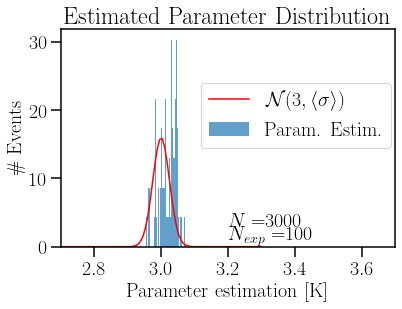

In [ ]:
x = np.linspace(2.6,3.3,100)
y = gauss(x,3,np.mean(vars)/np.sqrt(N))

plt.hist(means, bins = 50, density=True, alpha = 0.7, label = "Param. Estim.")

plt.plot(x,y,       color = "red"   , label = r"$\mathcal{N}(3,\langle\sigma\rangle)$")
plt.xlim(2.7,3.7)

plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.text(3.2, 3, "$N =$"+str("{:.0f}".format(N)))
plt.text(3.2, 1, "$N_{exp} =$"+str("{:.0f}".format(Nexp)))
plt.title("Estimated Parameter Distribution")
plt.legend(bbox_to_anchor=(0.39,0.8))